In [ ]:
pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 KB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622381 sha256=e5f21ab63cdfec7b06fd2fe539aec21157428fc9e7344341b752443895024b03
  Stored in directory: /root/.cache/pip/wheels/72/b8/3b/a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


In [ ]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
from pathlib import Path
import pandas as pd
import string
import re
from autocorrect import Speller
from nltk.stem import WordNetLemmatizer 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# pd.set_option('display.max_colwidth', -1)

<ipython-input-5-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### POST dataset - text 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Second year/Progetto SMA/post.csv")

In [ ]:
data.shape 

(1349, 8)

In [ ]:
data = data[data['text'] != "[removed]"]

In [ ]:
print("Shape of dataset with text:", data.shape)

Shape of dataset with text: (756, 8)


In [ ]:
data.tail()

,title,text,author,id,created_utc,URL,upvote_ratio,num_awards
1336,Best books or references to get back in the game?,"Hello all, I’m in my early 30’s. I went through a divorce and stayed single ever since (about 3 years now). The divorce and the Covid quarantine has definitely given me some social anxiety. Can I please get some references or good books to get back into the dating game? \nThank you!",IndicameIndica,yimxhf,2022-10-31 19:53:24,https://www.reddit.com/r/seduction/comments/yimxhf/best_books_or_references_to_get_back_in_the_game/,1.00,0
1341,Do you believe a girl who is willing to leave her man for college to have an LDR is “low interest”?,"I was talking to a buddy of mine about one of my first relationships a few years ago when I was 20. He believes that no woman will leave for college if she dating a man she’s in love with. \n\nI had a girlfriend who I met over the summer before her sophomore year. She went to a university out of state. We got into a relationship right before she left. Things were hard that first year but we got through it. My older brother was a new corporate lawyer making 6 figures and I would borrow money to go see her twice that year. The other times I would see her during winter and spring break when she came down. The longer we were together the more serious things became. She started to talk about us being together for a long time. She would send me engagement rings etc. \n\nShe came home for the summer before her junior year and things were great, but they started to go downhill once she went back to school. She became attached. And wanted me to visit her once a month. I worked remote so she didn’t see it as a big deal. But I had recently cofounded an excavation company in our hometown. It required a lot of time. At first I saw the distance as a good thing. I wouldn’t be distracted. But I became more and more sexually frustrated and starved of intimacy as the weeks went on. She missed me more as well. \n\nI expressed to her my frustrations. She became more and more worried that I’d cheat on her or breakup with her. I told her she could transfer to a state school in our home state. She didn’t seem interested. Instead, she INSISTED that I come see her. I gave in and saw her for a week and a half while my friend ran the business. I spent over $1000 on that trip. I told her I couldn’t come see her anymore and that I’d see her when she was home for break. She would then continue to still ask me if I could come see her again. I told her no this time and that we would see each other when we happened to be in the same state. \n\nShe told me time and time again how she was looking to transfer and move back home. It never happened. I eventually broke things off with her as I felt the relationship was becoming one sided. She begged and begged but I wasn’t willing to put my life aside anymore to see her if she wasn’t going to at least try to look into transferring. \n\nWhen I told this story to a few of my guys, one individual revealed to me that if a woman is really into a man she will do whatever is in her power to close the distance; that her leaving to college the first year we met was to be expected, however anything after that and she wasn’t as in love as you or she thought she was. This was a slight blow to my ego no lie. \n\nWe would end up linking up twice after she graduated by I ended up moving states. I’m 28 now. Thoughts? \n\nTLDR; Do you think any woman who is willing to continuously go back to college (when she has other alternatives) and be in a long distance relationship with a man is not truly in love with him?",KingsVictory19,yiqedj,2022-10-31 22:05:37,https://www.reddit.com/r/seduction/comments/yiqedj/do_you_believe_a_girl_who_is_willing_to_leave_her/,1.00,0
1342,"Request to MODS &amp; Community --- Can we please stop with ""how do I talk to this girl in my ...."" questions","This is a RANT...\n\nI've been on this sub for ages (on and off). One trend that concerns is that almost eve

#### **Removing links**

In [ ]:
data_links = data[data['text'].str.contains(r"www\.[A-Za-z]*\.com", regex = True)] #data containing links
print("Size of the dataset with links:", data_links.shape)
display(data_links.head(1))

Size of the dataset with links: (10, 8)


,title,text,author,id,created_utc,URL,upvote_ratio,num_awards
227,This thread encompasses perfectly why I don’t approach women,https://www.reddit.com/r/TrueOffMyChest/comments/xvinca/im_only_attracted_to_white_men/?utm_source=share&utm_medium=ios_app&utm_name=iossmf\n\n1744 likes to this. How am I supposed to feel confident approaching any woman as a black man? 😂,NaN,xvxig4,2022-10-05 02:01:54,https://www.reddit.com/r/seduction/comments/xvxig4/this_thread_encompasses_perfectly_why_i_dont/,0.31,0


In [ ]:
def remove_links(text):
  https = re.sub(r'http\S+', ' ', text)
  com = re.sub(r"www\.[A-Za-z]*\.com", " ", https)
  return com

In [ ]:
data['text']= data['text'].apply(remove_links)

In [ ]:
data[data['text'].str.contains(r"[A-Za-z]*\.com", regex = True)] 

,title,text,author,id,created_utc,URL,upvote_ratio,num_awards


#### **Remove sepration pattern**
Pattern `#x200B` is used as extra white-space between paragraphs. It needs to be removed.

In [ ]:
data_sep = data[data['text'].str.contains(r"#x200B", regex = True)]

In [ ]:
data_sep

title  \
153   Ways to help to drop a girl's 'guard'                                                                                                                       
219   How come women are allowed to have standards but men are not?                                                                                               
220   how do you respond to girls that send snaps of their face with no text? Also if a girl asks wyd late at night, is she dtf or just bored?                    
280   How to get her back                                                                                                                                         
489   What to do if I'm afraid of sex?                                                                                                                            
493   4 easy ways to start a conversation with any girl                                                                                                           
499   [REPOST] 4 easy ways to start a conversation with any girl                                                                                                  
513   How do you start conversation with girls without being boring - how are you,how was your day etc ?                                                          
586   Neil Strauss 30 Days- Facts about me and 1st day                                                                                                            
624   UPDATED Seddit Rules / Posting Guidelines - 10/16/22                                                                                                        
636   When she asks you What's Your Fantasy                                                                                                                       
714   Hello I need help                                                                                                                                           
755   I don't know how to get over my fear of rejection when it comes to approaching total strangers, especially girls I'm attracted to.                          
765   Warm Up                                                                                                                                                     
864   Invite a girld who sold me a book to a date                                                                                                                 
904   How can I be less reserved and more fun (ie. break out of my shell)?                                                                                        
1014  Direct or indirect opener?                                                                                                                                  
1023  Is it weird to find masculine traits in women attractive? And how can I go about it?                                                                        
1159  The last post you'll need to read here: Just do difficult things, be vulnerable, and treat women like intelligent and interesting individuals. That's it.   
1213  Should I be concerned with how she's replying?                                                                                                              
1234  Tinder - what do I say after ice breaker? How to improve my text game?                                                                                      
1239  Did you find out a girl is a freak in the sheets through words alone?                                                                                       
1266  HALLOWEEN SATURDAY (SORRY FOR THE LONG READ)                                                                                                                

                                                                                                                                                                                                                                                 

In [ ]:
def remove_sep(text):
  no_sep = re.sub(r"#x200B", " ", text)
  return no_sep

In [ ]:
data_sep['text'] = data_sep['text'].apply(remove_sep)
data_sep.head(1)

<ipython-input-19-d9b2e6e702e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sep['text'] = data_sep['text'].apply(remove_sep)


,title,text,author,id,created_utc,URL,upvote_ratio,num_awards
153,Ways to help to drop a girl's 'guard',"It's no secret, women are very wary of strangers. With OLD quickly losing its luster- IRL is the best way to meet new women. Building rapport is key to have a girl open up and actually have a conversation to progress into hanging out, dating, etc. Sometimes I'm at a loss when the girl is clearly interested, but the progression to introduction to dating stumbles. As an acceptability attractive man, I get plenty of IOIs and comments like ""you look mysterious"" but getting to a date is tough. Perhaps I'm coming off too ""gamey"" like they believe I say those things to all the girls- even though I'm not looking for a FWB. \n\nI genuinely want to make a connection although often my back breaks trying to carry conversations.\n\n& ;\n\nAnything you found successful?",royal_jeans,xuxl2e,2022-10-03 22:32:32,https://www.reddit.com/r/seduction/comments/xuxl2e/ways_to_help_to_drop_a_girls_guard/,0.63,0


In [ ]:
data['text'] = data['text'].apply(remove_sep) #apply to the original dataset

#### **Hashatags**

In [ ]:
data_canc = data[data['text'].str.contains(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", regex = True)]
data_canc.head()

,title,text,author,id,created_utc,URL,upvote_ratio,num_awards
1236,26 approaches - 1 success,"Hey guys, I approached around 26 people in a span of 3,5 hours in 3 major cities. I'm a big believer of AMS's saying ""She either likes what she sees or she doesn't"" and I basically just say that I find her attractive and ask for her number. Initally, I wanted to approach 100 to get a good sample size, but apparently it's very hard for me to find a woman I think is attractive enough, maybe I'm aiming too high. \n\nHere are the various responses I got and this should serve as motivation that it's very rare that a girl tells you to fuck off or similar. \n\nFacts about me: germany, 24, black, 181/182 cm (about 6 feet), thinning or receding hairline but i have a head full of hair, shaved face, very skinny 64 kg (will join gym next year again but will surely quit again since even 3500 calories gets me only to 67 kg, sedentary lifestyle, extreme hardgainer),\n\n\#1 This was on a shopping street and a woman in her 30s was walking with her female friend. She told me ""sorry, i have a bf"".\n\n\#2 This girl just looks at me, ignores me and passes me\n\n\#3 I caught her looking at me (i think so) through the window of a cafe and I entered it, but she completely ignores me when I start to talk to her.\n\n\#4 This girl just straight up tells me ""no"".\n\n\#5 this young black woman in her 20s was chilling with another female black friend and she just shakes her head. Later on when I was looking for the next to approach she kinda follows me with her friend and she obviously told her friend to come speak to me. The friend said to me ""You wanted her number?"". No offense, but in general my preference are white /hispanic / middle eastern women and I approached her because the girl looked decent, but I can take it or leave it. I just said to her ""No, there are 1000 women, it's alright"" or something like that. I have no clue what would have happened if she gave me her number, maybe she would have ghosted or never replied to my message, maybe she found it funny and wanted to play games with me or we could have married, haha, but there is plenty of fish in the sea and maybe I should approach more black women ;) I count this approach as success.\n\n\#6 This girl just shakes her head after speaking to her\n\n\#7 She told me it was nice of me but she is married and has 1 kid.\n\n\#8 this girl tells me ""no, sorry!""\n\n\#9 this black girl just shakes her head\n\n\#10 she just straight up tells me ""no""\n\n\#11 i believe she was russian and just tells me ""no""\n\n\#12 this was in the train and she told me ""sorry, i have a bf""\n\n\#13 this girl also tells me ""i have a bf""\n\n\#14 i was sitting next to this girl in train and she tells me ""no""\n\nThe following was at a subway station\n\n\#15 no\n\n\#16 no\n\n\#17 no\n\n\#18 no\n\nOutside again\n\n\#19 just shakes her head\n\n\#20 this girl tells me ""I don't give my number"" out, i just take it as rejection and move on\n\n\#21 she just tells me no\n\n\#22 this girl says ""surely not"". this was by far the meanest rejection of that day :(\n\n\#23 she just tells me no\n\n\#24 she just tells me no aswell\n\n\#25 this woman doesn't even look me in the eye and ignored me\n\n\#26 this one tells me ""no, i have a bf"".\n\nTo be honest, it sucks so much especially if you see all those girls in crop tops and short clothes and stuff and I don't masturbate at all. Luckily for me I regularly visit my favourite brothel and on that sameday (it was yesterday) I eased my pain with some girls there, or else, I would be touch starved for a verrrry long time :)\n\nWhat do you guys think about it? Should I change my style or something?",tinyservant,yhbgt4,2022-10-30 10:56:24,https://www.reddit.com/r/seduction/comments/yhbgt4/26_approaches_1_success/,0.99,0


In [ ]:
def remove_canc(text):
  no_canc = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", " ", text)
  return no_canc

In [ ]:
data['text'] = data['text'].apply(remove_canc) #apply to the original dataset

#### **Numbers**

In [ ]:
data['text']= data['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
#data['text'][207] 

#### **Removing newlines**

In [ ]:
def remove_newlines_tabs(text):
    formatted = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return formatted

In [ ]:
data['text'] = data['text'].apply(remove_newlines_tabs)

In [ ]:
data.head()

,title,text,author,id,created_utc,URL,upvote_ratio,num_awards
1,I'm no longer introverted (It clicked in me today..),"Something clicked in me today.. Earlier I went and cold approached a pretty woman who was sitting at a bench waiting for her friend, asked if she'd mind if I sat next to her and she said no, so I sat and started talking to her, and we had a good conversation going on! After minutes of talking, I had to leave, so I left, and didn't bother asking for her number or anything, despite the IOI's I got, I just didn't feel like asking for it.. Mainly because that was prob the only time we'd meet, anyways. During that whole thing, my heart wasn't racing, I was relaxed, and I was interested in engaging in a convo with her.. At that moment, it was like I broke through the bottleneck I been stuck on, which was gaining confidence and being chill! Went to a table of girls and a few dudes I never talked to during lunch, I asked if they wanted to play uno, and we got to playing. I engaged with all of them, made fun of them in a playful way during the game, and got their instas and dabbed them up, all without me overthinking or having second thoughts, if anything I was eager to play and get to know all of them! All throughout today, I was able to have convos with a lot of girls/guys while putting the knowledge from this seddit and other sources into play, checking for IOI's, dabbing them up and seeing how long they hold my hand for, all while staying relaxed. Thank you everyone, your knowledge and different perspectives have aided me greatly. I still have a lot to learn since I'm not getting kissed or laid any time soon, but I'll get there I'm sure",Forward_Noise1342,xsh3gu,2022-10-01 00:23:12,https://www.reddit.com/r/seduction/comments/xsh3gu/im_no_longer_introverted_it_clicked_in_me_today/,1.00,0
4,Blind Spots,"I’ve made around approaches since moving to my new city last year but only gotten laid twice. I approach in a respectful way and almost always get a good reaction, but have a lot of trouble with flaking after getting the number/IG. Not to be a douche but I am also told I am attractive very often, and everyone in my social circle thinks I’m a player who gets a lot of girls. It’s frustrating living this double life where I’m the only one who knows I’m not nearly as successful as I apparently comes across. Especially as I really just want a loving connection with a woman who I am genuinely interested in and attracted to (not to be a douche again, but someone on my level of physical attractiveness, intelligent, and kind hearted). I’ve let the realization of the gap between my efforts and my results kill the excitement that came with the first major steps of learning game. I don’t know what my problem is, so I’d appreciate any actionable feedback or criticisms. Thank you 🙏",psychicblasterr,xsi5cd,2022-10-01 01:13:19,https://www.reddit.com/r/seduction/comments/xsi5cd/blind_spots/,0.92,0
5,Is it true that girls love attention the same way guys love blowjobs?,"I find myself texting / talking to girls for far too long, failing to escalate to a date. They hit me up to chat or whatever, are flirty through text, but are always busy when I ask them out. I realized I often am the ""attention guy"" and that's it. I need to cut my losses and move on. And when I do begin to move on, they start texting me more and double texting, perhaps trying to lure me back? I fall for it. Eventually, ask them out again. And another excuse of busy or whatever. I need to stop. But anyways, why do girls do this?? Is it true they love attention the same way we love blowjobs? There's many women we'd probably have a fling with, but we wouldn't really want anything more serious. Are women the similar in a way? They love some guys' attention but don't want anything more than that?",eatmypekpek,xsjs63,2022-10-01 02:33:50,https://www.reddit.com/r/seduction/comments/xsjs63/is_it_true_that_girls_love_attention_the_same_way/,1.00,0
6,drug abuse gets you laid. Ha

#### **Removing whitespaces**
Removing extra whitespaces

In [ ]:
def remove_whitespaces(text):
    return " ".join(text.split())

In [ ]:
data['text'] = data['text'].apply(remove_whitespaces)

#### **Removing some punctuation**

In [ ]:
my_punctuation = list(['"','#','$','%','&','+','=','@','_','`','~','{','}','€','¯'])

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([w for w in text if w not in my_punctuation])
    return punctuationfree

In [ ]:
data['text'] = data['text'].apply(remove_punctuation)

#### **SpaCy Lemmatizer**

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def stemming_spacy(text):
    s=""
    doc = nlp(text)
    for word in doc:
     l = word.lemma_
     s+=" "+l
    return s

In [ ]:
data['SpacyLemma'] = data['text'].apply(stemming_spacy)

In [ ]:
data.head()

,title,text,author,id,created_utc,URL,upvote_ratio,num_awards,SpacyLemma
1,I'm no longer introverted (It clicked in me today..),"Something clicked in me today.. Earlier I went and cold approached a pretty woman who was sitting at a bench waiting for her friend, asked if she'd mind if I sat next to her and she said no, so I sat and started talking to her, and we had a good conversation going on! After minutes of talking, I had to leave, so I left, and didn't bother asking for her number or anything, despite the IOI's I got, I just didn't feel like asking for it.. Mainly because that was prob the only time we'd meet, anyways. During that whole thing, my heart wasn't racing, I was relaxed, and I was interested in engaging in a convo with her.. At that moment, it was like I broke through the bottleneck I been stuck on, which was gaining confidence and being chill! Went to a table of girls and a few dudes I never talked to during lunch, I asked if they wanted to play uno, and we got to playing. I engaged with all of them, made fun of them in a playful way during the game, and got their instas and dabbed them up, all without me overthinking or having second thoughts, if anything I was eager to play and get to know all of them! All throughout today, I was able to have convos with a lot of girls/guys while putting the knowledge from this seddit and other sources into play, checking for IOI's, dabbing them up and seeing how long they hold my hand for, all while staying relaxed. Thank you everyone, your knowledge and different perspectives have aided me greatly. I still have a lot to learn since I'm not getting kissed or laid any time soon, but I'll get there I'm sure",Forward_Noise1342,xsh3gu,2022-10-01 00:23:12,https://www.reddit.com/r/seduction/comments/xsh3gu/im_no_longer_introverted_it_clicked_in_me_today/,1.00,0,"something click in I today .. early I go and cold approach a pretty woman who be sit at a bench wait for her friend , ask if she would mind if I sit next to she and she say no , so I sit and start talk to she , and we have a good conversation go on ! after minute of talking , I have to leave , so I leave , and do not bother ask for her number or anything , despite the IOI 's I get , I just do not feel like ask for it .. mainly because that be prob the only time we would meet , anyways . during that whole thing , my heart be not race , I be relaxed , and I be interested in engage in a convo with she .. at that moment , it be like I break through the bottleneck I been stick on , which be gain confidence and be chill ! go to a table of girl and a few dude I never talk to during lunch , I ask if they want to play uno , and we get to play . I engage with all of they , make fun of they in a playful way during the game , and get their insta and dab they up , all without I overthinke or have second thought , if anything I be eager to play and get to know all of they ! all throughout today , I be able to have convos with a lot of girl / guy while put the knowledge from this seddit and other source into play , check for IOI 's , dab they up and see how long they hold my hand for , all while stay relaxed . thank you everyone , your knowledge and different perspective have aid I greatly . I still have a lot to learn since I be not getting kiss or lay any time soon , but I will get there I be sure"
4,Blind Spots,"I’ve made around approaches since moving to my new city last year but only gotten laid twice. I approach in a respectful way and almost always get a good reaction, but have a lot of trouble with flaking after getting the number/IG. Not to be a douche but I am also told I am attractive very often, and everyone in my social circle thinks I’m a player who gets a lot of girls. It’s frustrating living this double life where I’m the only one who knows I’m not nearly as successful as I apparently comes across. Especially as I really just want a loving connection with a woman who I am genuinely interested in and attracted to (not to 

#### **Sentiment Analysis** - VADER 

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.0 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_analyzer_scores(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence) #computing scores for every sentiment
    sentiment_value = sentiment_dict['compound'] #consider only the compound score - that is the average
    return sentiment_value

In [ ]:
data['CompoundValue'] = data['SpacyLemma'].apply(sentiment_analyzer_scores)

In [ ]:
data.head(1)

,title,text,author,id,created_utc,URL,upvote_ratio,num_awards,SpacyLemma,CompoundValue
1,I'm no longer introverted (It clicked in me today..),"Something clicked in me today.. Earlier I went and cold approached a pretty woman who was sitting at a bench waiting for her friend, asked if she'd mind if I sat next to her and she said no, so I sat and started talking to her, and we had a good conversation going on! After minutes of talking, I had to leave, so I left, and didn't bother asking for her number or anything, despite the IOI's I got, I just didn't feel like asking for it.. Mainly because that was prob the only time we'd meet, anyways. During that whole thing, my heart wasn't racing, I was relaxed, and I was interested in engaging in a convo with her.. At that moment, it was like I broke through the bottleneck I been stuck on, which was gaining confidence and being chill! Went to a table of girls and a few dudes I never talked to during lunch, I asked if they wanted to play uno, and we got to playing. I engaged with all of them, made fun of them in a playful way during the game, and got their instas and dabbed them up, all without me overthinking or having second thoughts, if anything I was eager to play and get to know all of them! All throughout today, I was able to have convos with a lot of girls/guys while putting the knowledge from this seddit and other sources into play, checking for IOI's, dabbing them up and seeing how long they hold my hand for, all while staying relaxed. Thank you everyone, your knowledge and different perspectives have aided me greatly. I still have a lot to learn since I'm not getting kissed or laid any time soon, but I'll get there I'm sure",Forward_Noise1342,xsh3gu,2022-10-01 00:23:12,https://www.reddit.com/r/seduction/comments/xsh3gu/im_no_longer_introverted_it_clicked_in_me_today/,1.0,0,"something click in I today .. early I go and cold approach a pretty woman who be sit at a bench wait for her friend , ask if she would mind if I sit next to she and she say no , so I sit and start talk to she , and we have a good conversation go on ! after minute of talking , I have to leave , so I leave , and do not bother ask for her number or anything , despite the IOI 's I get , I just do not feel like ask for it .. mainly because that be prob the only time we would meet , anyways . during that whole thing , my heart be not race , I be relaxed , and I be interested in engage in a convo with she .. at that moment , it be like I break through the bottleneck I been stick on , which be gain confidence and be chill ! go to a table of girl and a few dude I never talk to during lunch , I ask if they want to play uno , and we get to play . I engage with all of they , make fun of they in a playful way during the game , and get their insta and dab they up , all without I overthinke or have second thought , if anything I be eager to play and get to know all of they ! all throughout today , I be able to have convos with a lot of girl / guy while put the knowledge from this seddit and other source into play , check for IOI 's , dab they up and see how long they hold my hand for , all while stay relaxed . thank you everyone , your knowledge and different perspective have aid I greatly . I still have a lot to learn since I be not getting kiss or lay any time soon , but I will get there I be sure",0.9838


In [ ]:
def negative_value(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence) #computing scores for every sentiment
    sentiment_value = sentiment_dict['neg'] #consider only the compound score - that is the average
    return sentiment_value
  

In [ ]:
data['NegativeValue'] = data['SpacyLemma'].apply(negative_value)

In [ ]:
def positive_value(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence) #computing scores for every sentiment
    sentiment_value = sentiment_dict['pos'] #consider only the compound score - that is the average
    return sentiment_value

In [ ]:
data['PositiveValue'] = data['SpacyLemma'].apply(positive_value)

In [ ]:
def neutral_value(sentence):
    sentiment_dict = sentiment.polarity_scores(sentence) #computing scores for every sentiment
    sentiment_value = sentiment_dict['neu'] #consider only the compound score - that is the average
    return sentiment_value

data['NeutralValue'] = data['SpacyLemma'].apply(neutral_value)

In [ ]:
data.head()

,title,text,author,id,created_utc,URL,upvote_ratio,num_awards,SpacyLemma,CompoundValue,NegativeValue,PositiveValue,NeutralValue
1,I'm no longer introverted (It clicked in me today..),"Something clicked in me today.. Earlier I went and cold approached a pretty woman who was sitting at a bench waiting for her friend, asked if she'd mind if I sat next to her and she said no, so I sat and started talking to her, and we had a good conversation going on! After minutes of talking, I had to leave, so I left, and didn't bother asking for her number or anything, despite the IOI's I got, I just didn't feel like asking for it.. Mainly because that was prob the only time we'd meet, anyways. During that whole thing, my heart wasn't racing, I was relaxed, and I was interested in engaging in a convo with her.. At that moment, it was like I broke through the bottleneck I been stuck on, which was gaining confidence and being chill! Went to a table of girls and a few dudes I never talked to during lunch, I asked if they wanted to play uno, and we got to playing. I engaged with all of them, made fun of them in a playful way during the game, and got their instas and dabbed them up, all without me overthinking or having second thoughts, if anything I was eager to play and get to know all of them! All throughout today, I was able to have convos with a lot of girls/guys while putting the knowledge from this seddit and other sources into play, checking for IOI's, dabbing them up and seeing how long they hold my hand for, all while staying relaxed. Thank you everyone, your knowledge and different perspectives have aided me greatly. I still have a lot to learn since I'm not getting kissed or laid any time soon, but I'll get there I'm sure",Forward_Noise1342,xsh3gu,2022-10-01 00:23:12,https://www.reddit.com/r/seduction/comments/xsh3gu/im_no_longer_introverted_it_clicked_in_me_today/,1.00,0,"something click in I today .. early I go and cold approach a pretty woman who be sit at a bench wait for her friend , ask if she would mind if I sit next to she and she say no , so I sit and start talk to she , and we have a good conversation go on ! after minute of talking , I have to leave , so I leave , and do not bother ask for her number or anything , despite the IOI 's I get , I just do not feel like ask for it .. mainly because that be prob the only time we would meet , anyways . during that whole thing , my heart be not race , I be relaxed , and I be interested in engage in a convo with she .. at that moment , it be like I break through the bottleneck I been stick on , which be gain confidence and be chill ! go to a table of girl and a few dude I never talk to during lunch , I ask if they want to play uno , and we get to play . I engage with all of they , make fun of they in a playful way during the game , and get their insta and dab they up , all without I overthinke or have second thought , if anything I be eager to play and get to know all of they ! all throughout today , I be able to have convos with a lot of girl / guy while put the knowledge from this seddit and other source into play , check for IOI 's , dab they up and see how long they hold my hand for , all while stay relaxed . thank you everyone , your knowledge and different perspective have aid I greatly . I still have a lot to learn since I be not getting kiss or lay any time soon , but I will get there I be sure",0.9838,0.019,0.130,0.850
4,Blind Spots,"I’ve made around approaches since moving to my new city last year but only gotten laid twice. I approach in a respectful way and almost always get a good reaction, but have a lot of trouble with flaking after getting the number/IG. Not to be a douche but I am also told I am attractive very often, and everyone in my social circle thinks I’m a player who gets a lot of girls. It’s frustrating living this double life where I’m the only one who knows I’m not nearly as successful as I apparently comes across. Especially as I really just want a loving co

In [ ]:
def get_sentiment(value): #for compound score
  if value >= 0.05: 
   return("Positive")
  elif value <= - 0.05:
   return("Negative")
  else:
   return("Neutral")


In [ ]:
data["SentimentAssociated"] = data['CompoundValue'].apply(get_sentiment)

In [ ]:
data.head()

,title,text,author,id,created_utc,URL,upvote_ratio,num_awards,SpacyLemma,CompoundValue,NegativeValue,PositiveValue,NeutralValue,SentimentAssociated
1,I'm no longer introverted (It clicked in me today..),"Something clicked in me today.. Earlier I went and cold approached a pretty woman who was sitting at a bench waiting for her friend, asked if she'd mind if I sat next to her and she said no, so I sat and started talking to her, and we had a good conversation going on! After minutes of talking, I had to leave, so I left, and didn't bother asking for her number or anything, despite the IOI's I got, I just didn't feel like asking for it.. Mainly because that was prob the only time we'd meet, anyways. During that whole thing, my heart wasn't racing, I was relaxed, and I was interested in engaging in a convo with her.. At that moment, it was like I broke through the bottleneck I been stuck on, which was gaining confidence and being chill! Went to a table of girls and a few dudes I never talked to during lunch, I asked if they wanted to play uno, and we got to playing. I engaged with all of them, made fun of them in a playful way during the game, and got their instas and dabbed them up, all without me overthinking or having second thoughts, if anything I was eager to play and get to know all of them! All throughout today, I was able to have convos with a lot of girls/guys while putting the knowledge from this seddit and other sources into play, checking for IOI's, dabbing them up and seeing how long they hold my hand for, all while staying relaxed. Thank you everyone, your knowledge and different perspectives have aided me greatly. I still have a lot to learn since I'm not getting kissed or laid any time soon, but I'll get there I'm sure",Forward_Noise1342,xsh3gu,2022-10-01 00:23:12,https://www.reddit.com/r/seduction/comments/xsh3gu/im_no_longer_introverted_it_clicked_in_me_today/,1.00,0,"something click in I today .. early I go and cold approach a pretty woman who be sit at a bench wait for her friend , ask if she would mind if I sit next to she and she say no , so I sit and start talk to she , and we have a good conversation go on ! after minute of talking , I have to leave , so I leave , and do not bother ask for her number or anything , despite the IOI 's I get , I just do not feel like ask for it .. mainly because that be prob the only time we would meet , anyways . during that whole thing , my heart be not race , I be relaxed , and I be interested in engage in a convo with she .. at that moment , it be like I break through the bottleneck I been stick on , which be gain confidence and be chill ! go to a table of girl and a few dude I never talk to during lunch , I ask if they want to play uno , and we get to play . I engage with all of they , make fun of they in a playful way during the game , and get their insta and dab they up , all without I overthinke or have second thought , if anything I be eager to play and get to know all of they ! all throughout today , I be able to have convos with a lot of girl / guy while put the knowledge from this seddit and other source into play , check for IOI 's , dab they up and see how long they hold my hand for , all while stay relaxed . thank you everyone , your knowledge and different perspective have aid I greatly . I still have a lot to learn since I be not getting kiss or lay any time soon , but I will get there I be sure",0.9838,0.019,0.130,0.850,Positive
4,Blind Spots,"I’ve made around approaches since moving to my new city last year but only gotten laid twice. I approach in a respectful way and almost always get a good reaction, but have a lot of trouble with flaking after getting the number/IG. Not to be a douche but I am also told I am attractive very often, and everyone in my social circle thinks I’m a player who gets a lot of girls. It’s frustrating living this double life where I’m the only one who knows I’m not nearly as successful as I apparently comes across. Especially as I

In [ ]:
print("The total number of negative posts is", data[data["SentimentAssociated"] == "Negative"].shape[0])
print("The total number of positive posts is", data[data["SentimentAssociated"] == "Positive"].shape[0])
print("The total number of neutral posts is", data[data["SentimentAssociated"] == "Neutral"].shape[0])

The total number of negative posts is 154
The total number of positive posts is 570
The total number of neutral posts is 32


#### Salvataggio dataframe

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/My Drive/Second year/Progetto SMA/PostProcessed2.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#  data.to_csv(f)

#### **Visualizations** 

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/Second year/Progetto SMA/PostProcessed2.csv")

In [ ]:
data['created_utc'] = pd.to_datetime(data['created_utc'])

In [ ]:
data.created_utc.dt.day

0       1
1       1
2       1
3       1
4       1
       ..
751    31
752    31
753    31
754    31
755    31
Name: created_utc, Length: 756, dtype: int64

In [ ]:
data['day'] = data.created_utc.dt.day

In [ ]:
pos = data[data['SentimentAssociated'] == 'Positive']
posg = pos.groupby(['day','SentimentAssociated'], as_index=False).count()
pos1 = posg[['day','PositiveValue']]

In [ ]:
pos1.shape

(31, 2)

In [ ]:
neg = data[data['SentimentAssociated'] == 'Negative']
negg = neg.groupby(['day','SentimentAssociated'], as_index=False).count()
neg1 = negg[['day','NegativeValue']]

In [ ]:
neg1

,day,NegativeValue
0,1,6
1,2,11
2,3,2
3,4,4
4,5,11
5,7,1
6,8,1
7,9,8
8,11,4
9,13,5


In [ ]:
neu = data[data['SentimentAssociated'] == 'Neutral']
neug = neu.groupby(['day','SentimentAssociated'], as_index=False).count()
neug1 = neug[['day','NeutralValue']]

In [ ]:
data[data.created_utc.dt.day == 3]['SentimentAssociated']

65    Positive
66    Positive
67    Negative
68    Positive
69    Positive
70    Positive
71    Negative
72    Positive
Name: SentimentAssociated, dtype: object

In [ ]:
data[data['SentimentAssociated'] == 'Neutral'].created_utc.dt.day

16      1
34      2
37      2
103     4
113     5
127     5
134     5
141     5
148     6
150     6
157     6
166     7
193     9
198     9
236    10
246    11
249    11
250    11
253    11
376    17
377    17
378    17
379    17
414    19
447    21
500    23
516    24
555    24
567    25
578    26
667    29
740    31
Name: created_utc, dtype: int64

In [ ]:
new_df = pos1.merge(neug1, on='day', how='left')

In [ ]:
new_df

,day,PositiveValue,NeutralValue
0,1,27,1.0
1,2,18,2.0
2,3,6,NaN
3,4,28,1.0
4,5,27,4.0
5,6,12,3.0
6,7,15,1.0
7,8,9,NaN
8,9,34,2.0
9,10,9,1.0


In [ ]:
df = new_df.merge(neg1)

In [ ]:
df.tail()

,day,PositiveValue,NeutralValue,NegativeValue
22,27,14,NaN,3
23,28,28,NaN,10
24,29,16,1.0,5
25,30,34,NaN,9
26,31,23,1.0,9


Text(0.5, 0, 'Day')

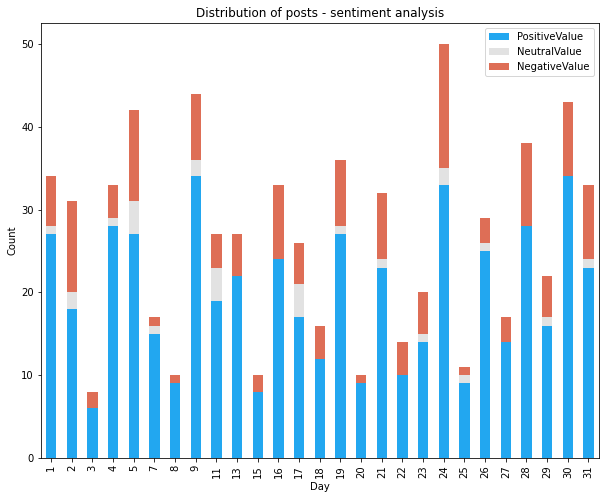

In [ ]:
ax = df.plot.bar(x='day', stacked=True, title='Distribution of posts - sentiment analysis', color =['#22a7f0', '#e2e2e2','#de6e56'],figsize=(10,8))
ax.set_ylabel('Count')
ax.set_xlabel('Day')

### **Percentage of posts grouped by sentiment**

In [ ]:
data.shape

(756, 16)

In [ ]:
p1 = data.groupby(['SentimentAssociated'],as_index=False).count()

In [ ]:
p1

,SentimentAssociated,Unnamed: 0,title,text,author,id,created_utc,URL,upvote_ratio,num_awards,SpacyLemma,CompoundValue,NegativeValue,PositiveValue,NeutralValue,day
0,Negative,154,154,154,153,154,154,154,154,154,154,154,154,154,154,154
1,Neutral,32,32,32,32,32,32,31,32,32,32,32,32,32,32,32
2,Positive,570,570,570,549,570,570,570,570,570,570,570,570,570,570,570


In [ ]:
p2 = p1[['SentimentAssociated','author']]

In [ ]:
p2['Percentage'] = p1.author.apply(lambda x: x / data.shape[0] * 100)

<ipython-input-32-969ba3ce3c4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2['Percentage'] = p1.author.apply(lambda x: x / data.shape[0] * 100)


In [ ]:
p2

,SentimentAssociated,author,Percentage
0,Negative,153,20.238095
1,Neutral,32,4.232804
2,Positive,549,72.619048
